In [42]:
import numpy as np 
import pandas as pd
import lightgbm as lgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [43]:
data = pd.read_csv("insta_train.csv")
test_data=pd.read_csv("insta_test.csv")
data.head(5)


,user,img,caption,likes,comments,language,hashtag,reference,caption_len,language_encoded,username,posts,followers,followings,description,photo_name,photo_path,file_size,id
0,_________zen_________,https://scontent-iad3-1.cdninstagram.com/vp/86...,・・・・・@the_mark_coffee_supply_osaka・・・#cafe #th...,369,2,undef,17,1,199,0.194302,ぜんちゃん🍪 ゜2003'(15)hyogo,115.0,3031.0,512.0,゜服とカフェと邦ロック ゜黒髪マッシュ ゜DMの返信バカみたいに遅いです,42905769_439791843213730_5017864565088339252_n...,insta//_________zen_________/photos/42905769_4...,56860,dc00ffd0e14df1a213ed5e8f468f815b
1,_________zen_________,https://scontent-iad3-1.cdninstagram.com/vp/3e...,フォロワー3000人ありがとうございます🙇🏻‍♂️未だに3000人以上の方に見てもらえる自覚...,598,4,ja,28,1,368,-0.241366,ぜんちゃん🍪 ゜2003'(15)hyogo,115.0,3031.0,512.0,゜服とカフェと邦ロック ゜黒髪マッシュ ゜DMの返信バカみたいに遅いです,43914398_492704434564675_6537094798011008080_n...,insta//_________zen_________/photos/43914398_4...,94371,cb0aa4cd83cb34f57f9304b408c72eb6
2,_________zen_________,https://scontent-iad3-1.cdninstagram.com/vp/22...,2枚あります！！(2枚目は(@soy_____boy )が考えてくれたZポーズ)・・・ガンク...,490,1,ja,29,1,310,-0.241366,ぜんちゃん🍪 ゜2003'(15)hyogo,115.0,3031.0,512.0,゜服とカフェと邦ロック ゜黒髪マッシュ ゜DMの返信バカみたいに遅いです,43076631_1885471914823443_3864868723504140996_...,insta//_________zen_________/photos/43076631_1...,56756,8d4af1387c49cca324ad4da97dec3dec
3,_________zen_________,https://scontent-iad3-1.cdninstagram.com/vp/7d...,・・・ドライフラワーがかわいすぎる🥀・・・#ドライフラワー #ドライフラワーのある暮らし #...,383,4,ja,17,0,159,-0.241366,ぜんちゃん🍪 ゜2003'(15)hyogo,115.0,3031.0,512.0,゜服とカフェと邦ロック ゜黒髪マッシュ ゜DMの返信バカみたいに遅いです,44338627_352762532138975_2716964186030712515_n...,insta//_________zen_________/photos/44338627_3...,71524,268a9b55ef6efc713ef2af94fe54eaf1
4,_________zen_________,https://scontent-iad3-1.cdninstagram.com/vp/74...,・・・アウフィでパシャリ📸・・・#お洒落さんと繋がりたい #お洒落な人と繋がりたい #オシャ...,562,4,ja,30,0,246,-0.241366,ぜんちゃん🍪 ゜2003'(15)hyogo,115.0,3031.0,512.0,゜服とカフェと邦ロック ゜黒髪マッシュ ゜DMの返信バカみたいに遅いです,43913884_186984038851987_4521652618530561597_n...,insta//_________zen_________/photos/43913884_1...,96965,76b551ee9337dbd80380a0f57b352007


In [44]:
test_data.head

<bound method NDFrame.head of                    user                                                img  \
0      _____.xana._____  https://scontent-iad3-1.cdninstagram.com/vp/a1...   
1      _____.xana._____  https://scontent-iad3-1.cdninstagram.com/vp/23...   
2      _____.xana._____  https://scontent-iad3-1.cdninstagram.com/vp/59...   
3      _____.xana._____  https://scontent-iad3-1.cdninstagram.com/vp/1f...   
4      _____.xana._____  https://scontent-iad3-1.cdninstagram.com/vp/8c...   
...                 ...                                                ...   
10430       zzini_jieun  https://scontent-atl3-1.cdninstagram.com/vp/63...   
10431       zzini_jieun  https://scontent-atl3-1.cdninstagram.com/vp/e4...   
10432       zzini_jieun  https://scontent-atl3-1.cdninstagram.com/vp/d3...   
10433       zzini_jieun  https://scontent-atl3-1.cdninstagram.com/vp/f7...   
10434       zzini_jieun  https://scontent-atl3-1.cdninstagram.com/vp/5f...   

                                 

In [45]:
data.describe()

,likes,comments,hashtag,reference,caption_len,language_encoded,posts,followers,followings,file_size
count,4.154000e+04,41540.000000,41540.000000,41540.000000,41540.000000,41540.000000,41528.000000,4.152800e+04,41528.000000,41540.000000
mean,1.845068e+03,36.291671,4.331319,0.391815,164.736760,-0.005810,664.901777,4.350593e+04,734.787709,63756.457126
std,1.870867e+04,449.641366,8.861552,1.371004,276.372764,0.978785,2313.023959,3.442230e+05,1321.580452,29947.163350
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-4.954476,1.000000,0.000000e+00,0.000000,938.000000
25%,2.900000e+01,0.000000,0.000000,0.000000,14.000000,-0.421274,32.000000,3.320000e+02,67.000000,43651.000000
50%,9.400000e+01,2.000000,0.000000,0.000000,64.000000,0.194302,132.000000,1.346000e+03,275.000000,60488.000000
75%,3.900000e+02,11.000000,4.000000,0.000000,199.000000,0.771767,477.000000,1.296600e+04,762.000000,80060.250000
max,1.172445e+06,56686.000000,231.000000,39.000000,2198.000000,2.730278,66674.000000,1.373194e+07,7877.000000,640803.000000


In [46]:
data.isnull().sum()

user                    0
img                     0
caption              5599
likes                   0
comments                0
language                0
hashtag                 0
reference               0
caption_len             0
language_encoded        0
username                0
posts                  12
followers              12
followings             12
description         19952
photo_name              0
photo_path              0
file_size               0
id                      0
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user              41540 non-null  object 
 1   img               41540 non-null  object 
 2   caption           35941 non-null  object 
 3   likes             41540 non-null  int64  
 4   comments          41540 non-null  int64  
 5   language          41540 non-null  object 
 6   hashtag           41540 non-null  int64  
 7   reference         41540 non-null  int64  
 8   caption_len       41540 non-null  int64  
 9   language_encoded  41540 non-null  float64
 10  username          41540 non-null  object 
 11  posts             41528 non-null  float64
 12  followers         41528 non-null  float64
 13  followings        41528 non-null  float64
 14  description       21588 non-null  object 
 15  photo_name        41540 non-null  object 
 16  photo_path        41540 non-null  object

<function matplotlib.pyplot.show(close=None, block=None)>

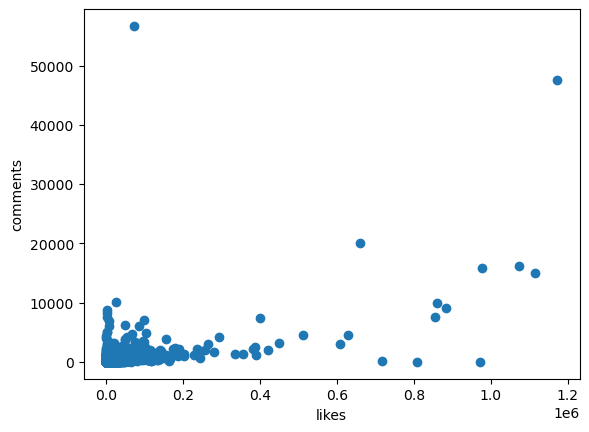

In [48]:
plt.scatter(x=data["likes"],y= data["comments"])
plt.xlabel("likes")
plt.ylabel("comments")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

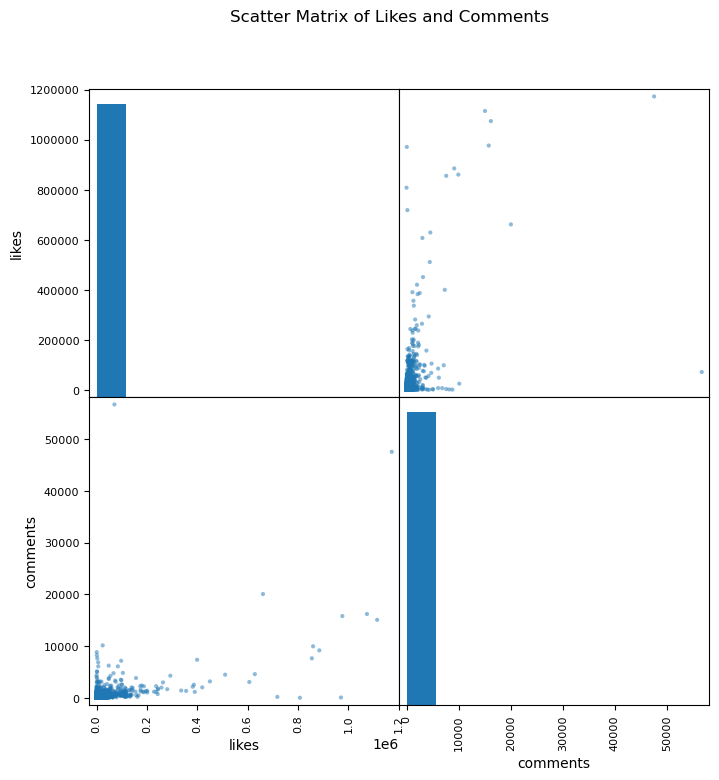

In [49]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[["likes", "comments"]],figsize=(8,8))
plt.suptitle("Scatter Matrix of Likes and Comments", fontsize=12)
plt.show

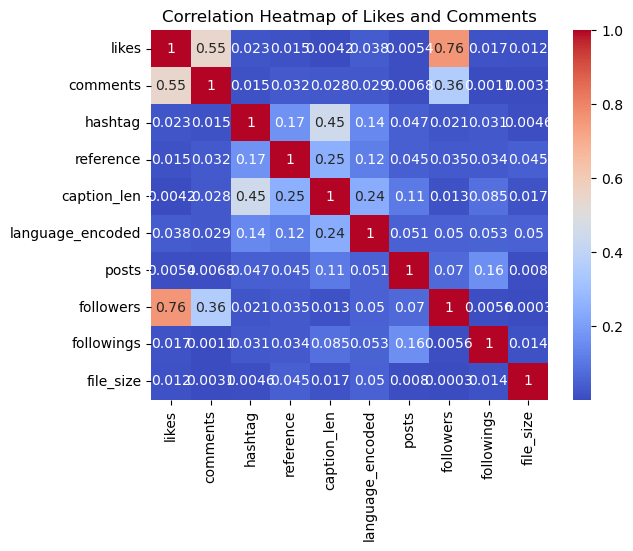

In [50]:
import seaborn as sns

correlation_matrix = data.corr().abs()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Likes and Comments")
plt.show()


In [51]:
x = []
y=[]
for i in data["likes"]:
    x.append(i)
for i in data["comments"]:
    y.append(i)  

Text(0, 0.5, 'comments')

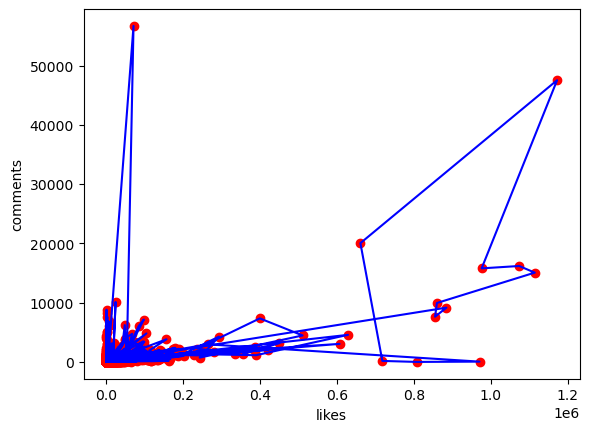

In [52]:
plt.scatter(x,y,color="red")
plt.plot(x,y,color="blue")
plt.xlabel("likes")
plt.ylabel("comments")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


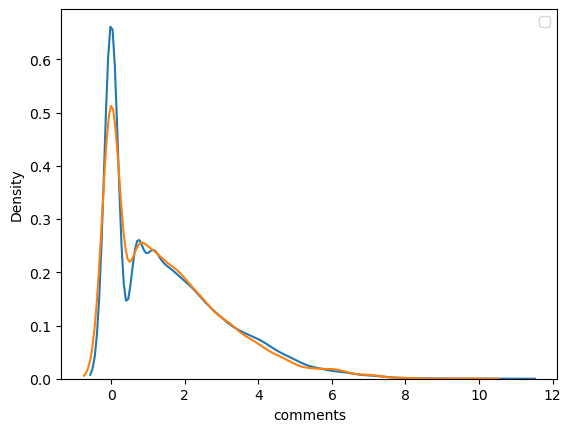

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


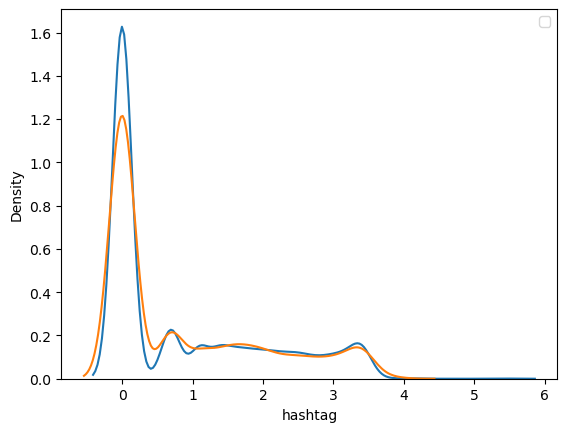

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


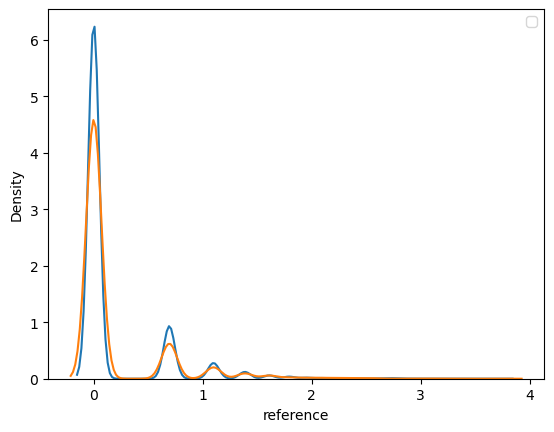

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


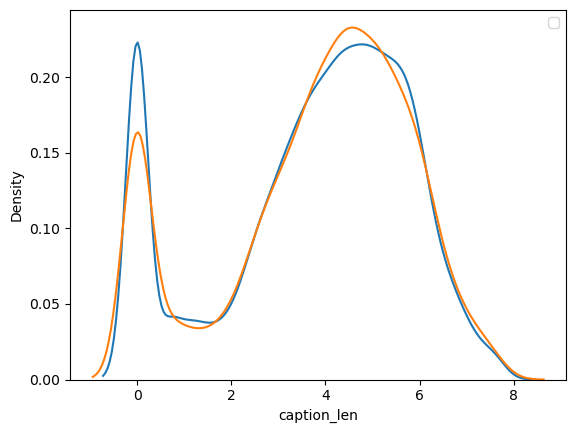

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


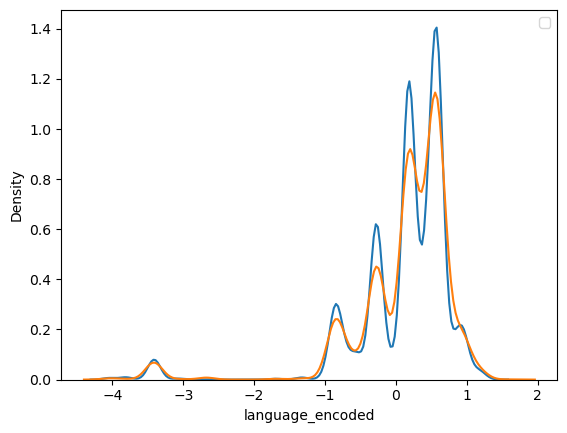

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


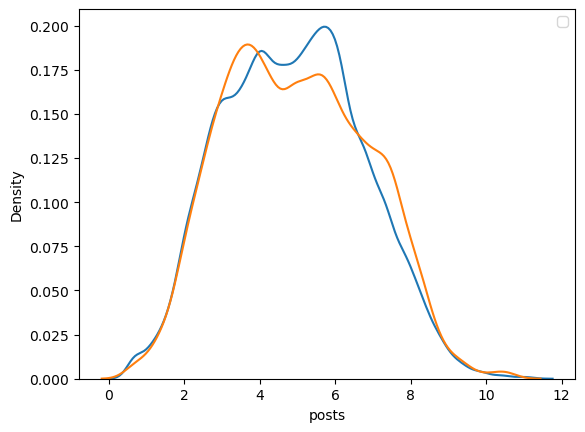

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


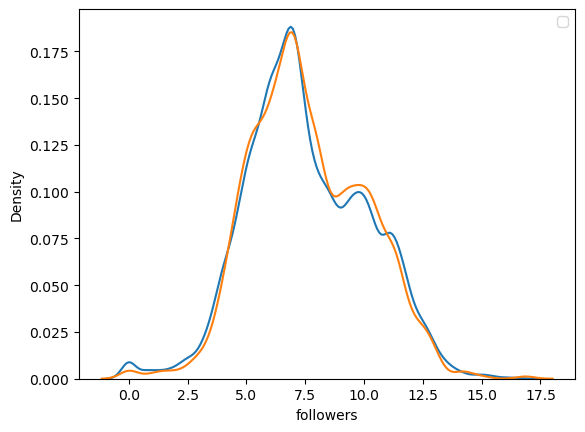

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


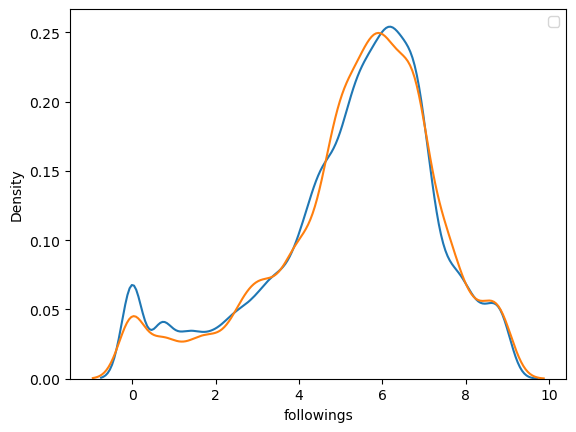

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


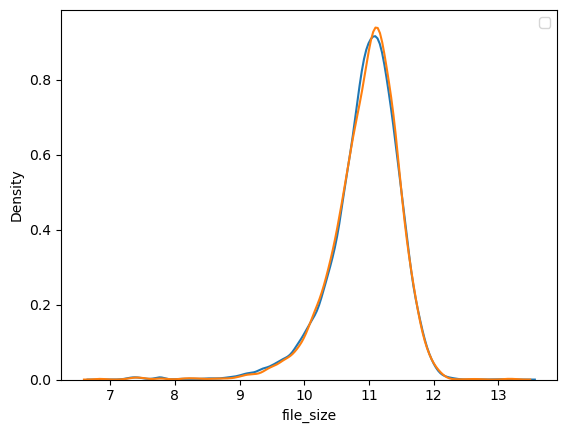

In [53]:
# #Compare distributions of test and train
for i in data.select_dtypes(exclude=['object']).drop(['likes'], axis=1):
     sns.kdeplot(np.log1p(data[i]))
     sns.kdeplot(np.log1p(test_data[i]))
     plt.legend()
     plt.show() 

<Axes: title={'center': 'likes'}, xlabel='user'>

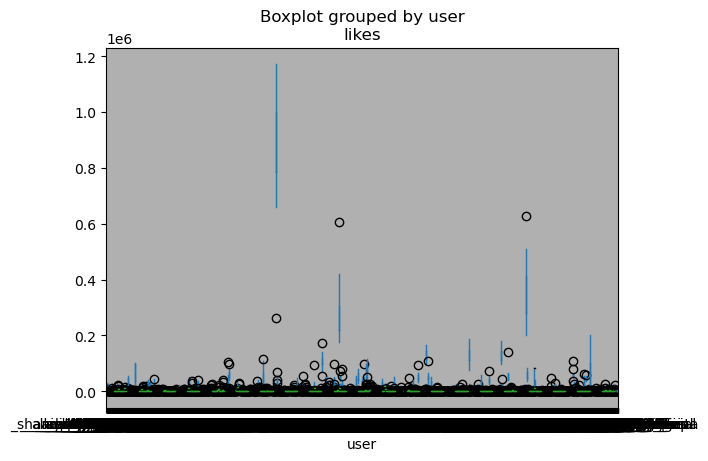

In [54]:
data.boxplot(column='likes', by = 'user')